### Consumer's Buying Behavior:
Analyzing the relationship between age, estimated salary, and purchase behavior in response to the advertisement.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-network-ads/social_ads.csv


In [3]:
df = pd.read_csv("/kaggle/input/social-media-network-ads/social_ads.csv")

In [4]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [5]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [6]:
df.shape

(400, 3)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df)

     Age  EstimatedSalary  Purchased
23    45            22000          1
54    27            58000          0
74    32            18000          0
86    24            55000          0
94    29            83000          0
138   28            59000          0
150   26            15000          0
186   20            82000          0
192   29            43000          0
195   34            43000          0
198   26            80000          0
231   39            42000          0
236   40            57000          0
246   35            50000          0
256   41            72000          0
257   40            57000          0
263   35            72000          0
266   40            75000          0
290   39           134000          1
312   38            50000          0
322   41            52000          0
326   41            72000          0
332   42            65000          0
341   35            75000          0
349   38            61000          0
357   41            72000          0
3

In [8]:
print(df.duplicated().tail(10))

390     True
391    False
392    False
393     True
394    False
395    False
396    False
397    False
398    False
399    False
dtype: bool


In [9]:
df = df.drop_duplicates()
df.shape

(367, 3)

To check if there are any NaN values in the DataFrame:

In [10]:
df.isna().any().any()
#df.isna().sum()

False

### EDA:

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
class_counts = df['Purchased'].value_counts()
print(class_counts)

Purchased
0    229
1    138
Name: count, dtype: int64


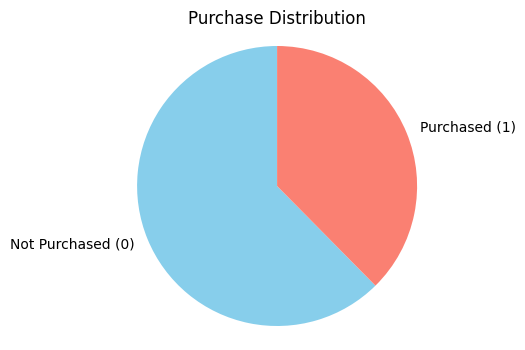

In [13]:
plt.figure(figsize=(6,4))
plt.pie(class_counts, labels=['Not Purchased (0)', 'Purchased (1)'], startangle=90, colors=['skyblue', 'salmon'])
plt.axis('equal')
plt.title('Purchase Distribution')
plt.show()

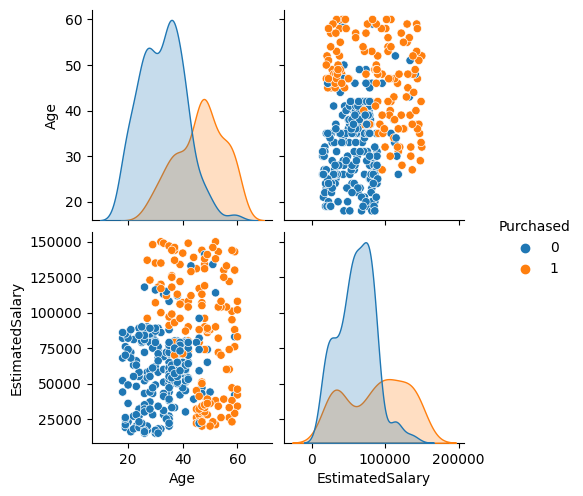

In [14]:
sns.pairplot(df, hue='Purchased')

#### sns.pairplot():
This creates a grid of scatter plots for every pair of features in the DataFrame df. For a DataFrame with n features, this will produce an n x n grid.
- On the diagonal, you'll see histograms or KDE plots (depending on the dataset and settings).
- Off-diagonal, you'll see scatter plots between pairs of features.

#### Linear Relationships:
Definition: A linear relationship between two features means that as one feature increases or decreases, the other feature increases or decreases in a consistent, straight-line manner.

- How to Identify: In a scatter plot (off-diagonal plots in sns.pairplot()), if the points form a straight line or a consistent upward/downward trend, then the relationship is likely linear.
- Example: If you plot feature A vs feature B and the points form a straight line (or approximately a straight line), then there is a linear relationship between them. Price vs Quantity Sold might show a linear relationship if price increases lead to a consistent increase or decrease in quantity sold.

#### Non-linear Relationships:
Definition: A non-linear relationship occurs when the relationship between two features doesn't follow a straight line, and the change in one feature doesn't correspond to a consistent change in the other.

- How to Identify: In a scatter plot, a curved or scatter pattern suggests that the relationship is non-linear.
- Example: If you plot feature A vs feature B and the points curve upwards or downwards (like a U-shape or exponential curve), then the relationship is likely non-linear. Income vs Spending on Luxury Goods might be non-linear if, after a certain income level, spending increases rapidly or slows down at higher incomes.

#### Insight:
- If you identify linear relationships, simple models like Logistic Regression might work well.
- If you identify non-linear relationships, models like Random Forest, XGBoost, or Neural Networks are better suited because they can capture more complex interactions.

In [15]:
print(df.corr())

                      Age  EstimatedSalary  Purchased
Age              1.000000         0.167771   0.626164
EstimatedSalary  0.167771         1.000000   0.375624
Purchased        0.626164         0.375624   1.000000


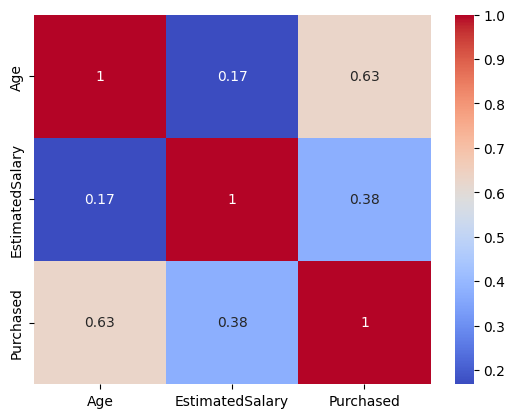

In [16]:
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')
plt.show()

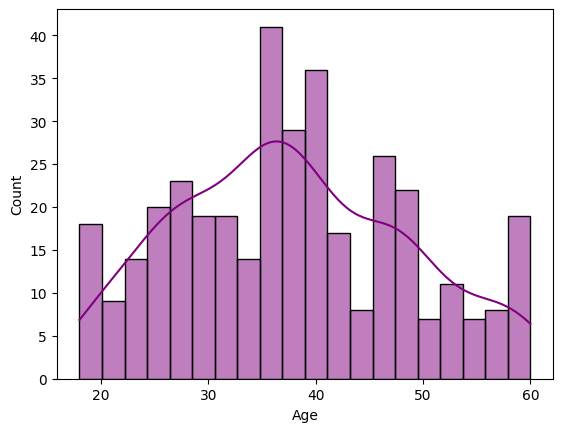

In [17]:
sns.histplot(df['Age'], bins=20, kde =True, color='purple')
plt.show()

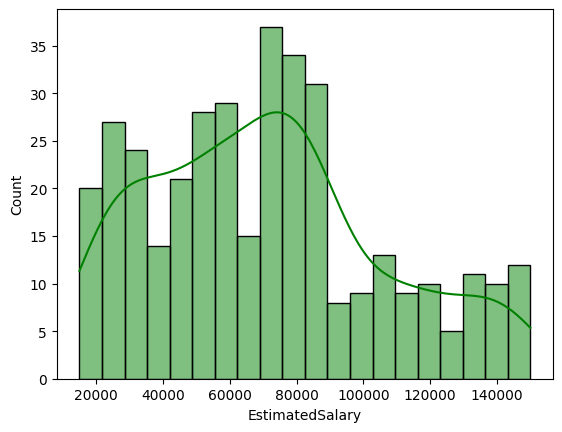

In [18]:
sns.histplot(df['EstimatedSalary'], bins=20, kde =True, color='green')
plt.show()

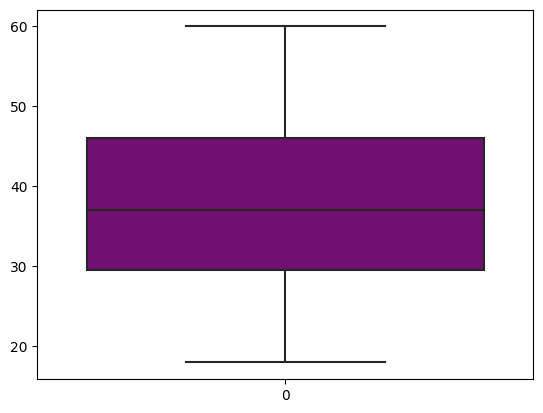

In [19]:
sns.boxplot(df['Age'], color='purple')
plt.show()

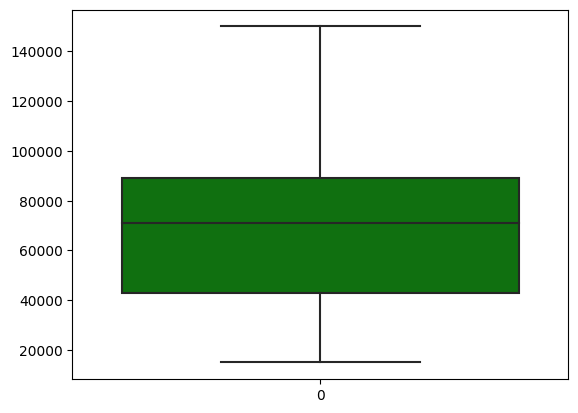

In [20]:
sns.boxplot(df['EstimatedSalary'], color='green')
plt.show()

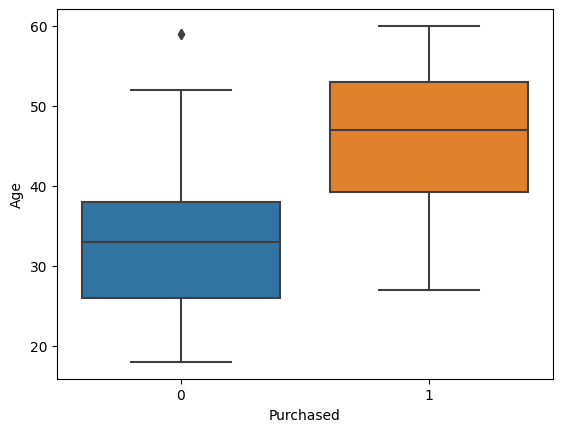

In [21]:
sns.boxplot(x='Purchased', y='Age', data=df)
plt.show()

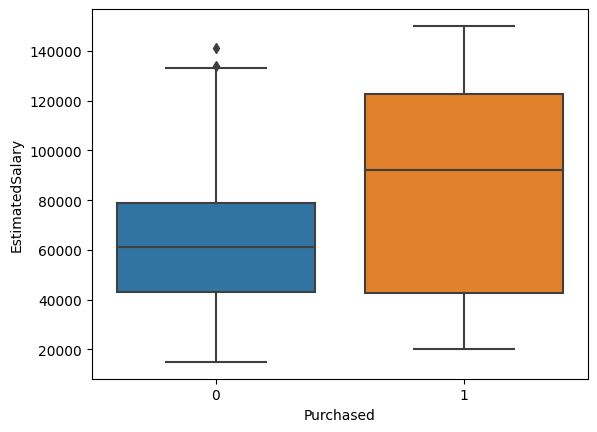

In [22]:
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df)
plt.show()

In [23]:
X = df.iloc[:, 0:2] 
y = df[['Purchased']]
# X.head()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Note: By setting random_state to a specific integer value, you ensure that the split will be the same every time you run the code, making your results reproducible. If you don't set random_state, the split will be different each time you run the code, making it harder to compare results across different runs.

In [26]:
model = LogisticRegression(random_state=42)

In [27]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn import metrics

[[55  1]
 [34  2]]


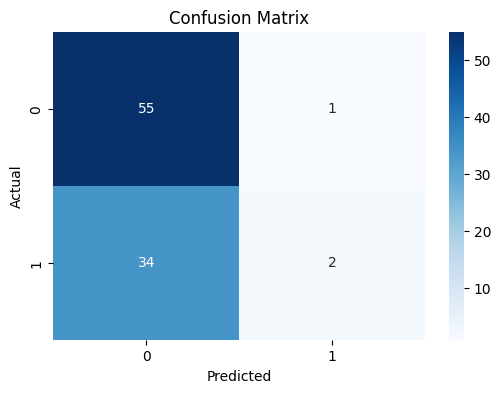

In [30]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Interpretation
- True Negatives (TN) = 55: The model correctly predicted Negative (0) for 55 cases.
- False Positives (FP) = 1: The model incorrectly predicted Positive (1) for 1 case that was actually Negative.
- False Negatives (FN) = 34: The model incorrectly predicted Negative (0) for 34 cases that were actually Positive.
- True Positives (TP) = 2: The model correctly predicted Positive (1) for 2 cases.

#### Key Insights

- High False Negatives (34): The model is missing a lot of actual positives. This suggests poor recall, meaning it struggles to identify actual positives.
- Few False Positives (1): The model is good at avoiding false alarms, indicating high precision.
- True Positives are Very Low (2): The model has difficulty correctly classifying positive cases.

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.98      0.76        56
           1       0.67      0.06      0.10        36

    accuracy                           0.62        92
   macro avg       0.64      0.52      0.43        92
weighted avg       0.64      0.62      0.50        92



Notes:

- When dealing with a small to medium-sized dataset, Logistic Regression could still be a good choice, especially with regularization, but other models like Random Forest or XGBoost might perform better if the data is complex or imbalanced.
- For larger datasets or complex relationships, XGBoost and LightGBM often perform best, especially with proper hyperparameter tuning.

### How Changing Models Can Help

##### Complex Relationships:

Logistic Regression assumes a linear decision boundary, meaning it may fail if the relationship between features and target is non-linear. Models like Random Forest and XGBoost can capture complex, non-linear relationships more effectively.

##### Handling Imbalance:

Logistic Regression can struggle with highly imbalanced datasets because it treats all errors (both false positives and false negatives) equally. Models like Random Forest and XGBoost handle class imbalance more gracefully, either by adjusting sample weights or by using boosting techniques.

##### Robustness to Noise:

Ensemble methods like Random Forest and XGBoost are more robust to noisy data because they aggregate predictions from multiple models, reducing overfitting and increasing generalization.

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model2 = RandomForestClassifier()

In [34]:
model2.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = model2.predict(X_test)

[[49  7]
 [ 6 30]]


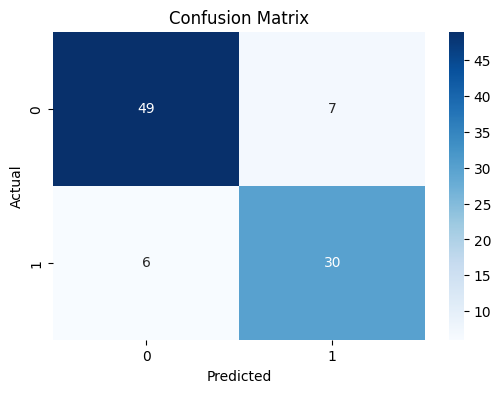

In [36]:
rf_cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(rf_cnf_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(rf_cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This matrix shows the performance of your model in classifying instances into two classes: Class 0 (Not Purchased) and Class 1 (Purchased).

- 50 (True Negatives): The model correctly predicted Class 0 (Not Purchased) as Class 0.
- 6 (False Positives): The model incorrectly predicted Class 1 (Purchased) when the actual class was Class 0.
- 6 (second row) (False Negatives): The model incorrectly predicted Class 0 (Not Purchased) when the actual class was Class 1.
- 30 (True Positives): The model correctly predicted Class 1 (Purchased) as Class 1.

##### Summary:
- The model made 50 correct predictions for Class 0 (Not Purchased) and 30 correct predictions for Class 1 (Purchased).
- There were 6 misclassifications where the model predicted Class 1 for Class 0 (False Positives) and 6 misclassifications where the model predicted Class 0 for Class 1 (False Negatives).

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        56
           1       0.81      0.83      0.82        36

    accuracy                           0.86        92
   macro avg       0.85      0.85      0.85        92
weighted avg       0.86      0.86      0.86        92



##### Interpretation:
- The model seems to perform well in predicting both Class 0 (Not Purchased) and Class 1 (Purchased), but it does slightly better in predicting Class 0 (since its recall and precision for Class 0 are higher).
- The false positives (6) and false negatives (6) suggest some errors in predicting the classes, but they are relatively low compared to the correct predictions.

#### How to Improve:
- Tuning the Model: Hyperparameter tuning (e.g., adjusting the number of trees, max depth, or minimum samples) to further improve the model's performance.
- Class Imbalance: If Class 1 is underrepresented, consider adjusting the model for class imbalance (e.g., using class_weight='balanced' or sampling methods like SMOTE).
- Feature Engineering: Adding or modifying features might help the model make better predictions, especially for Class 1.